In [1]:
import pandas as pd
from tcrdist.repertoire import TCRrep
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, classification_report, confusion_matrix, davies_bouldin_score, fowlkes_mallows_score

warnings.simplefilter(action='ignore')
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed


In [2]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species','vdjdb.score', 'meta']]

In [3]:
# pd.set_option('display.max_colwidth', None)
# df[['meta']].head(3)

In [4]:
# pd.reset_option('display.max_colwidth')

# filtered_df = df[df['complex.id'] == 4]
# filtered_df.head(5)

In [5]:
df.info()
# df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
 13  meta             92771 non-null  object
dtypes: int64(2), object(12)
memory usage: 9.9+ MB


In [6]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows:",\
      duplicate_rows_df.shape)

Number of duplicated rows: (280, 14)


### Dropping duplicate rows - not dropping since tcrdist3 take care of duplicated values

In [7]:
# # Drop duplicate rows
# df=df.drop_duplicates()
# df.shape

### Dropping null value

In [8]:
print(df.isnull().sum())

complex.id            0
gene                  0
cdr3                  0
v.segm              101
j.segm             1145
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
meta                  0
dtype: int64


In [9]:
df=df.dropna()
df.shape

(91550, 14)

**After dropping null value**


In [10]:
print(df.isnull().sum())

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
meta               0
dtype: int64


>**## Exploring the data ##**

In [11]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'

filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(2)



,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,meta
5309,0,TRB,CASSKLASTAGEQYF,TRBV2*01,TRBJ2-7*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*11:01,MHCII,DRFYKTLRAEQASQEV,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
5310,0,TRB,CASSGGQETQYF,TRBV14*01,TRBJ2-5*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,LNKIVRMYSPTSILD,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."


##  TCRDist3

In [12]:
df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

## Installing tcrdist3 package ##

In [13]:
# pip install tcrdist3
# installing tcrdist3

In [14]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')

# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [15]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [16]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text dataset for tcrdist3

In [17]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'vdjdb.score', 'meta'], dtype=object)

In [18]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.gene', 'antigen.species', 'vdjdb.score']]

In [19]:
filter=df['vdjdb.score']==0
df=df[~filter]
df.head(3)

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2


In [20]:
df_copy=df.copy()

# Separating data set in to alpha and beta dataframe

# Alpha data frame

In [21]:

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [22]:
print("alpha chain:", df_alpha.shape)
print("beta chain:", df_beta.shape)

alpha chain: (3676, 10)
beta chain: (8418, 10)


In [23]:
df_alpha.reset_index(drop=True, inplace=True)

## Remove complex_id 0

In [24]:
#remove complex_id 0
filter=df_alpha['complex.id']==0
df_alpha=df_alpha[~filter]

df_alpha.shape

(2812, 10)

In [25]:
filter=df_beta['complex.id']==0
df_beta=df_beta[~filter]

df_beta.shape

(2860, 10)

Size of two chain are approximately the same now

In [26]:
df_alpha = df_alpha[~df_alpha['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [27]:
df_alpha['species'].unique()

array(['HomoSapiens'], dtype=object)

In [28]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 0 to 3675
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       1913 non-null   int64 
 1   gene             1913 non-null   object
 2   cdr3_a_aa        1913 non-null   object
 3   v_a_gene         1913 non-null   object
 4   j_a_gene         1913 non-null   object
 5   species          1913 non-null   object
 6   antigen.epitope  1913 non-null   object
 7   antigen.gene     1913 non-null   object
 8   antigen.species  1913 non-null   object
 9   vdjdb.score      1913 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 164.4+ KB


## Run TCRDist on human alpha gene dataset

In [29]:
tr = TCRrep(cell_df = df_alpha, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

In [30]:
#tcrdist3 create a clone df that matches with the resulting distance matrix, 
#use this to concatnate the distance matrix with the corresponding epitope
tr.clone_df.shape
tr.clone_df.head(5)
clone_df_human_a=tr.clone_df

In [31]:
alpha_chain = tr.pw_alpha
alpha_chain.shape

(1913, 1913)

We need to scale the matrix before loading into tcrdist

In [32]:
# # Scaling the matrix

# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# alpha_scaled_df = std_scaler.fit_transform(alpha_chain)
# alpha_scaled_df

In [33]:
pca = PCA(n_components=50)
pca_alpha_homo = pca.fit_transform(alpha_chain)
pca_alpha_homo.shape

(1913, 50)

## Implementing TSNE

In [34]:

tsne = TSNE(n_components=2, random_state=42, perplexity=100)
X_tsne = tsne.fit_transform(pca_alpha_homo)
tsne.kl_divergence_

0.6259931325912476

In [35]:
alpha_homo_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])
alpha_homo_dist_df.head(5)

,A,B
0,-8.710640,13.389647
1,-1.551152,12.531853
2,23.122732,-17.112164
3,-8.710542,13.389576
4,-1.551161,12.531799


In [37]:
# combining the columns of the two dataframes
df_concat_a = pd.concat([alpha_homo_dist_df.reset_index(drop=True),clone_df_human_a.reset_index(drop=True)], axis=1)

In [38]:
# Create a dataframe for plotting
plot_a_df_homo = df_concat_a[['antigen.species', 'A', 'B']]

In [39]:
plot_a_df_homo.head(5)

,antigen.species,A,B
0,HIV-1,-8.710640,13.389647
1,HIV-1,-1.551152,12.531853
2,HIV-1,23.122732,-17.112164
3,HIV-1,-8.710542,13.389576
4,HIV-1,-1.551161,12.531799


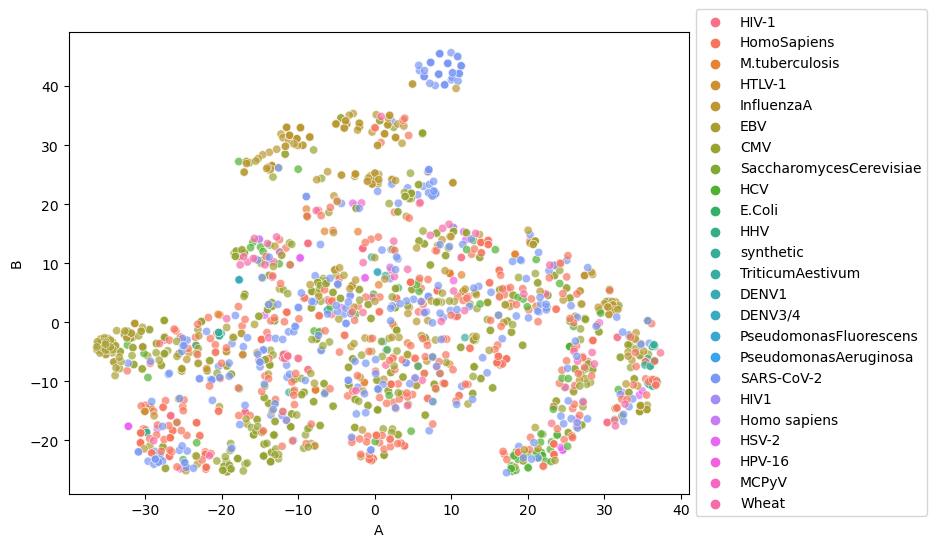

In [40]:
# Plotting using seaborn

plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_a_df_homo, x='A', y='B', hue='antigen.species', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [41]:

# fig_2d = px.scatter(
#     X_tsne, x=0, y=1,
#     color=plot_a_df_homo['antigen.species'], labels={'color': 'species'}
# )
# fig_2d.show()

## Implementing UMAP

In [42]:
# pip install umap-learn

In [43]:
pca_alpha_homo.shape

(1913, 50)

In [45]:
umap_2d = UMAP(n_neighbors = 150, n_components=2, random_state=0, metric='euclidean', min_dist=0.9)
proj_2d = umap_2d.fit_transform(pca_alpha_homo)

alpha_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_a = pd.concat([alpha_dist_df.reset_index(drop=True),clone_df_human_a.reset_index(drop=True)], axis=1)

plot_a_df_umap = df_concat_a[['antigen.species', 'A', 'B']]

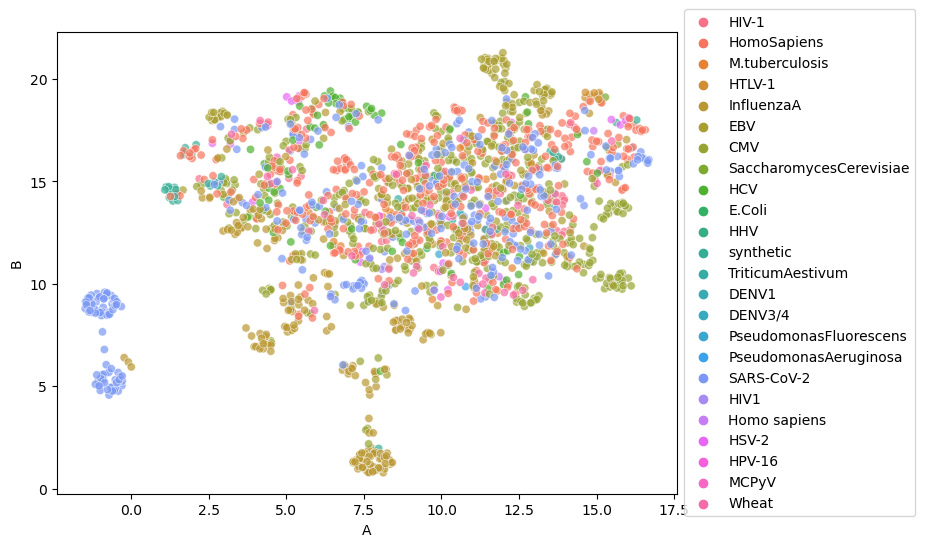

In [46]:
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_a_df_umap, x='A', y='B', hue='antigen.species', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Beta data frame - human

In [47]:
df_beta.head(5)

,complex.id,gene,cdr3_b_aa,v_b_gene,j_b_gene,species,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
8,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
10,5,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,2


In [48]:
df_beta = df_beta[~df_beta['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [49]:
df_beta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 1 to 92768
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       1938 non-null   int64 
 1   gene             1938 non-null   object
 2   cdr3_b_aa        1938 non-null   object
 3   v_b_gene         1938 non-null   object
 4   j_b_gene         1938 non-null   object
 5   species          1938 non-null   object
 6   antigen.epitope  1938 non-null   object
 7   antigen.gene     1938 non-null   object
 8   antigen.species  1938 non-null   object
 9   vdjdb.score      1938 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 166.5+ KB


In [50]:
tr = TCRrep(cell_df = df_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.clone_df.shape
tr.clone_df.head(5)
clone_df_human_b =tr.clone_df

In [51]:
beta_chain_human = tr.pw_beta
beta_chain_human.shape

(1938, 1938)

In [53]:
# Implement PCA
pca = PCA(n_components=50)
pca_beta_homo = pca.fit_transform(beta_chain_human)


#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
X_tsne = tsne.fit_transform(pca_beta_homo)


beta_homo_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])
beta_homo_dist_df.head(5)



# Combining the columns of the two dataframes
df_concat_b = pd.concat([beta_homo_dist_df.reset_index(drop=True),clone_df_human_b.reset_index(drop=True)], axis=1)

plot_b_df_homo = df_concat_b[['antigen.species', 'A', 'B']]

#PLotting beta chain
# fig_2d = px.scatter(
#     X_tsne, x=0, y=1,
#     color=plot_b_df_homo['antigen.species'], labels={'color': 'species'}
# )
# fig_2d.show()


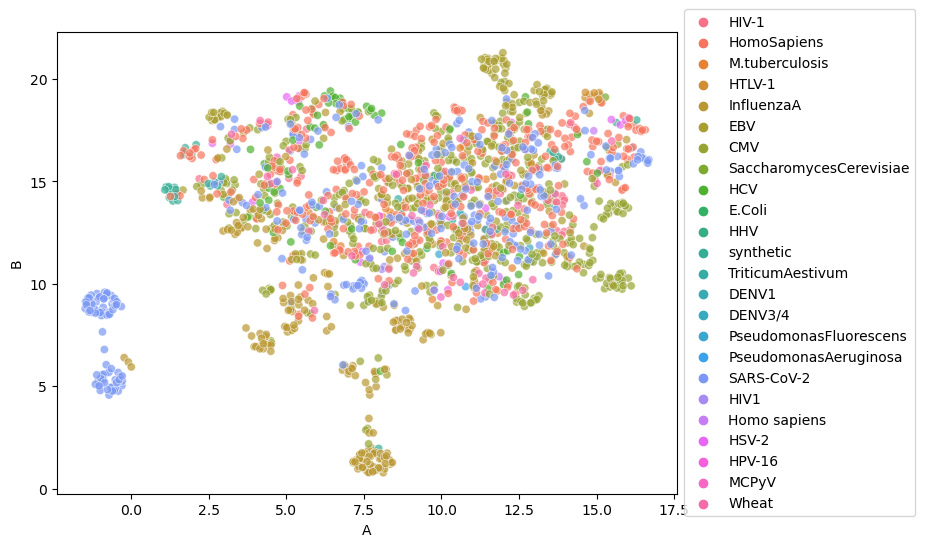

In [55]:
umap_2d = UMAP(n_neighbors = 150, n_components=2, random_state=0, metric='euclidean', min_dist=0.9)
proj_2d = umap_2d.fit_transform(pca_beta_homo)

beta_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_b = pd.concat([beta_dist_df.reset_index(drop=True),clone_df_human_b.reset_index(drop=True)], axis=1)

plot_b_df_umap = df_concat_a[['antigen.species', 'A', 'B']]



# Plotting using seaborn

plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_b_df_umap, x='A', y='B', hue='antigen.species', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Create combined data frame with alpha and beta chain

In [56]:
df_alpha = df_copy[df_copy['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df_copy[df_copy['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [57]:
df_alpha = df_alpha[df_alpha['complex.id'] != 0].reset_index(drop=True)
df_beta = df_beta[df_beta['complex.id'] != 0].reset_index(drop=True)

In [58]:
df_merge = pd.merge(df_alpha, df_beta, on='complex.id')


In [59]:
df_merge.drop(['species_y'], axis=1, inplace=True)

In [60]:
df_merge.species_x.value_counts()

HomoSapiens    1840
MusMusculus     899
Name: species_x, dtype: int64

In [61]:
filter_cond=df_merge['species_x']=='MusMusculus'
df_merge = df_merge[~filter_cond]

df_merge.reset_index(drop=True, inplace=True)

# # Correct filter creation
# filter_condition = df_merge['species_x'] == 'MusMusculus'

# # Applying the filter with the negation to keep rows where 'species_x' is not 'MusMusculus'
# df_filtered = df_merge[~filter_condition]

# # Resetting the index of the filtered DataFrame
# df_filtered.reset_index(drop=True, inplace=True)

# # Checking the shape of the new DataFrame
# print(df_filtered.shape)


In [62]:
# Correct filter creation
filter_condition = df_merge['vdjdb.score_x'] == 1

# Applying the filter with the negation to keep rows where 'species_x' is not 'MusMusculus'
df_filtered = df_merge[~filter_condition]

# Resetting the index of the filtered DataFrame
df_filtered.reset_index(drop=True, inplace=True)

# Checking the shape of the new DataFrame
print(df_filtered.shape)




(1156, 18)


In [63]:
df_filtered[['vdjdb.score_x']].value_counts()

vdjdb.score_x
3                615
2                541
dtype: int64

## Combined alpha and beta distance

In [64]:
tr = TCRrep(cell_df = df_merge, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            deduplicate = True,
            compute_distances = True)

# tr.clone_df.shape
# tr.clone_df.head(5)
clone_df_comb =tr.clone_df

In [65]:
tr.pw_alpha

array([[  0, 138, 110, ..., 159, 194, 149],
       [138,   0, 131, ..., 141, 152, 132],
       [110, 131,   0, ..., 166, 173, 129],
       ...,
       [159, 141, 166, ...,   0, 141, 133],
       [194, 152, 173, ..., 141,   0, 158],
       [149, 132, 129, ..., 133, 158,   0]], dtype=int16)

In [66]:
print("alpha shape:", tr.pw_alpha.shape)
print("beta shape", tr.pw_beta.shape)
print("clone shape", clone_df_comb.shape)

alpha shape: (1840, 1840)
beta shape (1840, 1840)
clone shape (1840, 26)


In [67]:
print("alpha shape:", tr.pw_cdr3_b_aa.shape)
print("beta shape", tr.pw_cdr3_b_aa.shape)

alpha shape: (1840, 1840)
beta shape (1840, 1840)


In [68]:
# combined_pw_distance_homo = tr.pw_cdr3_a_aa + tr.pw_cdr3_b_aa
combined_distance_mt_homo = tr.pw_beta + tr.pw_alpha
# combined_pw_distance_homo.shape

In [69]:
# Implement PCA
pca = PCA(n_components=50)
pca_combine_homo = pca.fit_transform(combined_distance_mt_homo)


#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=200)
X_tsne = tsne.fit_transform(pca_combine_homo)


combine_homo_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])
combine_homo_dist_df.head(5)


# Combining the columns of the two dataframes
df_concat_combine = pd.concat([combine_homo_dist_df.reset_index(drop=True),clone_df_comb.reset_index(drop=True)], axis=1)

plot_combine_df_homo = df_concat_combine[['antigen.species_x', 'A', 'B']]


# fig_2d.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_combine_df_homo, x='A', y='B', hue='antigen.species_x', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


KeyboardInterrupt: 

## THis is UMAP

In [ ]:
umap_2d = UMAP(n_neighbors = 170, n_components=2, random_state=0, min_dist=0.9)
proj_2d = umap_2d.fit_transform(pca_combine_homo)

combine_homo_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_combine = pd.concat([combine_homo_dist_df.reset_index(drop=True),clone_df_comb.reset_index(drop=True)], axis=1)

plot_combine_df_umap_homo = df_concat_combine[['antigen.species_x', 'A', 'B']]

#PLotting alpha chain umap
# fig_2d = px.scatter(
#     plot_combine_df_umap_homo, x='A', y='B',
#     color=plot_combine_df_umap_mouse['antigen.species_x'], labels={'color': 'species'}
# )
# fig_2d.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_combine_df_umap_homo, x='A', y='B', hue='antigen.species_x', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## Separating alpha and beta mouse

In [ ]:
# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})


#remove complex_id 0
filter=df_alpha['complex.id']==0
df_alpha=df_alpha[~filter]


filter=df_beta['complex.id']==0
df_beta=df_beta[~filter]

#filter mouse
df_alpha_mouse = df_alpha[df_alpha['species'].isin(['MusMusculus'])]
df_beta_mouse = df_beta[df_beta['species'].isin(['MusMusculus'])]



In [ ]:
df_beta_mouse

## Mouse alpha Chain

In [ ]:
tr = TCRrep(cell_df = df_alpha_mouse, 
            organism = 'mouse', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.clone_df.shape
tr.clone_df.head(5)
clone_df_mouse_a = tr.clone_df

alpha_chain_mouse = tr.pw_alpha


#PCA
pca = PCA(n_components=50)
pca_alpha_mouse = pca.fit_transform(alpha_chain_mouse)
pca_alpha_mouse.shape


In [ ]:
#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=100)
X_tsne = tsne.fit_transform(pca_alpha_mouse)


alpha_mouse_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])


# Combining the columns of the two dataframes
df_concat_a_mouse = pd.concat([alpha_mouse_dist_df.reset_index(drop=True),clone_df_mouse_a.reset_index(drop=True)], axis=1)

plot_a_df_mouse = df_concat_a_mouse[['antigen.species', 'A', 'B']]

#PLotting beta chain
fig_2d = px.scatter(
    X_tsne, x=0, y=1,
    color=plot_a_df_mouse['antigen.species'], labels={'color': 'species'}
)
fig_2d.show()



In [ ]:
umap_2d = UMAP(n_neighbors = 150, n_components=2, random_state=0, metric='euclidean', min_dist=0.9)
proj_2d = umap_2d.fit_transform(pca_alpha_mouse)

alpha_mouse_dist_df_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_a_mouse = pd.concat([alpha_mouse_dist_df_dist_df.reset_index(drop=True),clone_df_mouse_a.reset_index(drop=True)], axis=1)

plot_a_df_umap_mouse = df_concat_a_mouse[['antigen.species', 'A', 'B']]

#PLotting alpha chain umap
fig_2d = px.scatter(
    plot_a_df_umap_mouse, x='A', y='B',
    color=plot_a_df_umap_mouse['antigen.species'], labels={'color': 'species'}
)
fig_2d.show()


## Mouse Beta Chain

In [ ]:
tr = TCRrep(cell_df = df_beta_mouse, 
            organism = 'mouse', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.clone_df.shape
tr.clone_df.head(5)
clone_df_mouse_b = tr.clone_df

beta_chain_mouse = tr.pw_beta


#PCA
pca = PCA(n_components=50)
pca_beta_mouse = pca.fit_transform(beta_chain_mouse)
pca_beta_mouse.shape

In [ ]:
#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=100)
X_tsne = tsne.fit_transform(pca_beta_mouse)


beta_mouse_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])


# Combining the columns of the two dataframes
df_concat_b_mouse = pd.concat([beta_mouse_dist_df.reset_index(drop=True),clone_df_mouse_b.reset_index(drop=True)], axis=1)

plot_b_df_mouse = df_concat_b_mouse[['antigen.species', 'A', 'B']]

#PLotting beta chain
fig_2d = px.scatter(
    X_tsne, x=0, y=1,
    color=plot_b_df_mouse['antigen.species'], labels={'color': 'species'},
    color_continuous_scale='plasma'
)
fig_2d.show()



In [ ]:
umap_2d = UMAP(n_neighbors = 150, n_components=2, random_state=0, metric='euclidean', min_dist=0.99)
proj_2d = umap_2d.fit_transform(pca_beta_mouse)

beta_mouse_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_b_mouse = pd.concat([beta_mouse_dist_df.reset_index(drop=True),clone_df_mouse_b.reset_index(drop=True)], axis=1)

plot_b_df_umap_mouse = df_concat_b_mouse[['antigen.species', 'A', 'B']]

#PLotting alpha chain umap
fig_2d = px.scatter(
    plot_b_df_umap_mouse, x='A', y='B',
    color=plot_b_df_umap_mouse['antigen.species'], labels={'color': 'species'}, title='UMAP mouse beta chain'
)
fig_2d.show()


## Mouse combined Chain

In [ ]:
df_alpha_mouse 
df_beta_mouse 
df_merge_mouse = pd.merge(df_alpha_mouse, df_beta_mouse, on='complex.id')
df_merge_mouse.shape

In [ ]:
tr = TCRrep(cell_df = df_merge_mouse, 
            organism = 'mouse', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')


beta_chain_mouse = tr.pw_beta
alpha_chain_mouse = tr.pw_alpha
df_clone_comb_mouse = tr.clone_df

In [ ]:
combine_chain_mouse = alpha_chain_mouse + beta_chain_mouse
combine_chain_mouse.shape

## Task 5 Cluster Genes

Uhm... quite different. In PCA, you are given the multivariate continuous data (a multivariate vector for each subject), and you are trying to figure out if you don't need that many dimensions to conceptualize them. In (metric) MDS, you are given the matrix of distances between the objects, and you are trying to figure out what the locations of these objects in space are (and whether you need a 1D, 2D, 3D, etc. space). In non-metric MDS, you only know that objects 1 and 2 are more distant than objects 2 and 3, so you try to quantify that, on top of finding the dimensions and locations.



With a notable stretch of imagination, you can say that a common goal of PCA and MDS is to visualize objects in 2D or 3D. But given how different the inputs are, these methods won't be discussed as even distantly related in any multivariate textbook. I would guess that you can convert the data usable for PCA into data usable for MDS (say, by computing Mahalanobis distances between objects, using the sample covariance matrix), but that would immediately result in a loss of information: MDS is only defined up to location and rotation, and the latter two can be done more informatively with PCA.


https://stats.stackexchange.com/questions/14002/whats-the-difference-between-principal-component-analysis-and-multidimensional/132731#132731

https://scikit-learn.org/stable/modules/clustering.html

**Select Allogramative or K means**


**Fine tune them**

The purpose of this process is to reduce the number of features under consideration, where each feature is a dimension that partly represents the objects.
Why is dimensionality reduction important? As more features are added, the data becomes very sparse and analysis suffers from the curse of dimensionality. Additionally, it is easier to process smaller data sets.

https://www.imperva.com/blog/clustering-and-dimensionality-reduction-understanding-the-magic-behind-machine-learning/

linear assumption of PCA: https://datascience.stackexchange.com/questions/93734/can-someone-clarify-what-the-linear-assumption-of-pca-ism

We all know that KMeans is great, but it does not work well with higher dimension data. Thanks to Curse of Dimensionality :( as the dimensions increase the distances between different data points tend to be close together and this is a huge problem especially when you are dealing with algorithms like KMeans that uses distance-based metrics to identify similar points for clustering. We can either reduce the number of features by:

a) By dropping features that are very similar to each other and keeping just one out of the two.

b) By combining features that represent more sensible information when considered together.

and if you cannot afford to do either of the two or even after applying them, the dimensions are a mess we then can

c) Use any of the several available dimensionality reduction techniques.

https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240


No need to scale down the distance matrix since it is not a common practice

In [ ]:
pca = PCA(n_components=2)
pca_alpha_homo = pca.fit_transform(alpha_chain)
pca_alpha_homo.shape

Select cluster algorithm here
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

## K-means Implementation

In [ ]:
#Elbow visuallizer
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=20), alpha_chain, k=(1,380))

Optimal K for K-means clustering is: 30

In [ ]:
# Fit Kmeans alfgorithm
kmeans = KMeans(n_clusters = 30, random_state = 0, n_init='auto')
kmeans.fit(alpha_chain)

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
kmeans.inertia_

In [ ]:
sns.scatterplot(data=alpha_homo_dist_df, x='A', y='B', hue=kmeans.labels_, palette='deep', )
plt.title('K-means Clustering of alpha chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
labels = kmeans.labels_
metrics.silhouette_score(alpha_chain, labels, metric='euclidean')

In [ ]:
#calinski harabasz
labels = kmeans.labels_
metrics.calinski_harabasz_score(alpha_chain, labels)

## K-means for combined chain human

In [ ]:
combined_distance_mt_homo.shape

this is the smaller distance value

In [ ]:
#Elbow visuallizer
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=20), combined_distance_mt_homo, k=(1,380))

In [ ]:
# Fit Kmeans alfgorithm
kmeans = KMeans(n_clusters = 43, random_state = 0, n_init='auto')
kmeans.fit(combined_distance_mt_homo)
kmeans.labels_

In [ ]:

sns.scatterplot(data=plot_combine_df_umap_homo, x='A', y='B', hue=kmeans.labels_, palette='deep', )
plt.title('K-means Clustering of combined chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)  # Set ncol=2 for two columns

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
def purity_score(y_true, y_pred):
    """Purity score

    To compute purity, each cluster is assigned to the class which is most frequent 
    in the cluster [1], and then the accuracy of this assignment is measured by counting 
    the number of correctly assigned documents and dividing by the number of documents.
    We suppose here that the ground truth labels are integers, the same with the predicted clusters i.e
    the clusters index.

    Args:
        y_true(np.ndarray): n*1 matrix Ground truth labels
        y_pred(np.ndarray): n*1 matrix Predicted clusters
    
    Returns:
        float: Purity score
    
    References:
        [1] https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html
    """
    # matrix which will hold the majority-voted labels
    y_voted_labels = np.zeros(y_true.shape)
    # Ordering labels
    ## Labels might be missing e.g with set like 0,2 where 1 is missing
    ## First find the unique labels, then map the labels to an ordered set
    ## 0,2 should become 0,1
    labels = np.unique(y_true)
    ordered_labels = np.arange(labels.shape[0])
    for k in range(labels.shape[0]):
        y_true[y_true==labels[k]] = ordered_labels[k]
    # Update unique labels
    labels = np.unique(y_true)
    # We set the number of bins to be n_classes+2 so that 
    # we count the actual occurence of classes between two consecutive bin
    # the bigger being excluded [bin_i, bin_i+1[
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred==cluster], bins=bins)
        # Find the most present label in the cluster
        winner = np.argmax(hist)
        y_voted_labels[y_pred==cluster] = winner
    
    return accuracy_score(y_true, y_voted_labels)

## Purity score

In [ ]:
y_true = plot_combine_df_homo['antigen.species_x']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(y_true) 

In [ ]:
kmeans.labels_

In [ ]:
#purity score
print("purity score:", purity_score(y_true, kmeans.labels_)) # from 0 to 1, moderate cluster quality
print("Silhouette score:", 
      metrics.silhouette_score(combined_distance_mt_homo,
                               kmeans.labels_, metric='euclidean')) # from -1 to 1, week cluster quality
print("Calinski harabasz score:", metrics.calinski_harabasz_score(combined_distance_mt_homo, kmeans.labels_))

dbi_score = davies_bouldin_score(combined_distance_mt_homo, kmeans.labels_)
print("Davies-Bouldin Index:", dbi_score) #lower better
fmi_score = fowlkes_mallows_score(y_true, kmeans.labels_)
print("Fowlkes-Mallows Index:", fmi_score) #The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.



# K-means mouse combined

In [ ]:
#Elbow visuallizer
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=20), combine_chain_mouse, k=(1,380))

In [ ]:
# Fit Kmeans alfgorithm
kmeans = KMeans(n_clusters = 26, random_state = 0, n_init='auto')
kmeans.fit(combine_chain_mouse)

In [ ]:
label_mouse = kmeans.labels_
label_mouse.shape

In [ ]:
y_true = df_clone_comb_mouse['antigen.species_x']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(y_true) 

In [ ]:
#purity score
print("purity score:", purity_score(y_true, kmeans.labels_)) # from 0 to 1, moderate cluster quality
print("Silhouette score:", 
      metrics.silhouette_score(combine_chain_mouse,
                               kmeans.labels_, metric='euclidean')) # from -1 to 1, week cluster quality
print("Calinski harabasz score:", metrics.calinski_harabasz_score(combine_chain_mouse, kmeans.labels_))

dbi_score = davies_bouldin_score(combine_chain_mouse, kmeans.labels_)
print("Davies-Bouldin Index:", dbi_score) #lower better
fmi_score = fowlkes_mallows_score(y_true, kmeans.labels_)
print("Fowlkes-Mallows Index:", fmi_score) #The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.



## Hierachrichal Clustering

Note that agglomerative clustering is good at identifying small clusters. Divisive hierarchical clustering is good at identifying large clusters. top down approach

https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=30,metric='precomputed', linkage='complete')

label=hierarchical_cluster.fit_predict(alpha_chain)

In [ ]:
sns.scatterplot(data=alpha_homo_dist_df, x='A', y='B', hue=label, palette='deep' )
plt.title('Visual of Hierachical Clustering of alpha chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Alpha chain Dendrogram average")

selected_data = alpha_chain
clusters = shc.linkage(selected_data, 
            method='average', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Alpha chain Dendrogram Complete")

selected_data = alpha_chain
clusters = shc.linkage(selected_data, 
            method='complete', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [ ]:
cluster_label = cut_tree(clusters, n_clusters=3).reshape(-1,)
labels = cluster_label

In [ ]:
#calinski harabasz
print("calinski_harabasz_score:", metrics.calinski_harabasz_score(alpha_chain, cluster_label))
print("silhouette_score :", metrics.silhouette_score(alpha_chain, cluster_label, metric='euclidean'))
print("purity score:", purity_score(y_true, kmeans.labels_))


In [ ]:
#perform actual clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3,metric='precomputed', linkage='average')

label=hierarchical_cluster.fit_predict(alpha_chain)


sns.scatterplot(data=alpha_homo_dist_df, x='A', y='B', hue=label, palette='deep' )
plt.title('Hierachical Clustering of alpha chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Hierarchy for combined chian

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Combined chain Dendrogram average")

selected_data = combined_distance_mt_homo
clusters = shc.linkage(selected_data, 
            method='average', 
            )
shc.dendrogram(Z=clusters)
plt.show()

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Combined chain Dendrogram complete")

selected_data = combined_distance_mt_homo
clusters = shc.linkage(selected_data, 
            method='complete')
shc.dendrogram(Z=clusters)
plt.show()

In [ ]:
cluster_label = cut_tree(clusters, n_clusters=8).reshape(-1,)

cluster_label.shape




In [ ]:

sns.scatterplot(data=plot_combine_df_umap_homo, x='A', y='B', hue=cluster_label, palette='deep', )
plt.title('K-means Clustering of combined chain using umap')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)  # Set ncol=2 for two columns

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#purity score
purity_score(y_true, cluster_label)

#purity score
print("purity score:", purity_score(y_true, cluster_label)) # from 0 to 1, moderate cluster quality
print("Silhouette score:", 
      metrics.silhouette_score(combined_distance_mt_homo,
                               cluster_label, metric='euclidean')) # from -1 to 1, week cluster quality
print("Calinski harabasz score:", metrics.calinski_harabasz_score(combined_distance_mt_homo, cluster_label))

dbi_score = davies_bouldin_score(combined_distance_mt_homo, cluster_label)
print("Davies-Bouldin Index:", dbi_score) #lower better
fmi_score = fowlkes_mallows_score(y_true, cluster_label)
print("Fowlkes-Mallows Index:", fmi_score) #The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.



## Hierarchical for mouse combined

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


fig, axs=plt.subplots(2,2, figsize=(15, 15))
metrics=['single', 'average', 'complete',  'centroid']
for i in range(2):
    for j in range(2):
        linked=linkage(X, metrics[(i*2)+j])
        dendrogram(linked, ax=axs[i,j])
        axs[i,j].set_title(metrics[(i*2)+j])

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 10), facecolor='white')  # Set the background color to white
plt.title("Combined chain Dendrogram complete")

selected_data = combine_chain_mouse
clusters = linkage(selected_data, method='complete')
dendrogram(clusters)
plt.show()


In [ ]:
cluster_label = cut_tree(clusters, n_clusters=8).reshape(-1,)

cluster_label.shape

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=6,metric='precomputed', linkage='average')

label=hierarchical_cluster.fit_predict(combine_chain_mouse)

In [ ]:
#purity score
print("purity score:", purity_score(y_true, label)) # from 0 to 1, moderate cluster quality
print("Silhouette score:", 
      metrics.silhouette_score(combine_chain_mouse,
                               label, metric='euclidean')) # from -1 to 1, week cluster quality
print("Calinski harabasz score:", metrics.calinski_harabasz_score(combine_chain_mouse, label))

dbi_score = davies_bouldin_score(combine_chain_mouse, label)
print("Davies-Bouldin Index:", dbi_score) #lower better
fmi_score = fowlkes_mallows_score(y_true, label)
print("Fowlkes-Mallows Index:", fmi_score) #The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.



## DBSCAN Clustering

Selecting optimal k value

https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/#ii_Minimum_Points_minPts

In [ ]:
# pip install kneed
alpha_chain

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11, metric='precomputed')
neighbors = nearest_neighbors.fit(alpha_chain)

distances, indices = neighbors.kneighbors(alpha_chain)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")


In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=55
, min_samples=11, metric = 'precomputed')
dbscan_cluster.fit(alpha_chain)

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)


In [ ]:
sns.scatterplot(data=alpha_homo_dist_df, x='A', y='B', hue=dbscan_cluster.labels_, palette='deep' )
plt.title('DBSCAN of alpha chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Combined Chain DBScan

In [ ]:
combined_distance_mt_homo.shape

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11, metric='precomputed')
neighbors = nearest_neighbors.fit(combined_distance_mt_homo)

distances, indices = neighbors.kneighbors(combined_distance_mt_homo)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=100, min_samples=10, metric='precomputed')
dbscan_cluster.fit(combined_distance_mt_homo)

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)


In [ ]:
sns.scatterplot(data=plot_combine_df_umap_homo, x='A', y='B', hue=dbscan_cluster.labels_, palette='deep' )
plt.title('DBSCAN of combined chain using umap')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Evaluation of the clusters

In [ ]:
labels = dbscan_cluster.labels_
metrics.silhouette_score(combined_distance_mt_homo, labels)

In [ ]:
from sklearn import metrics

#calinski harabasz
labels = kmeans.labels_
metrics.calinski_harabasz_score(combined_distance_mt_homo, labels)

In [ ]:
purity_score(y_true, labels)

The model did not perform the clustering well on the dataset based on specificity. The reason could be that the data is sprase with manty variable of the CDR3 sequences.

## Task 6. Prediction based on specificity

### K Nearest Neighbor alpha chain

In [ ]:
df_alpha_homo=pd.DataFrame(alpha_chain)
df_alpha_homo['antigen.epitope'] = clone_df['antigen.epitope']
# df_alpha_homo['cdr3_a_aa'] = clone_df['cdr3_a_aa']

X=df_alpha_homo.iloc[:, :-1]
y=df_alpha_homo[['antigen.epitope']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['uniform', 'distance']
}

 
knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=14)
#fit model to data
knn_cv.fit(X_train, y_train)

In [ ]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

In [ ]:
y_knn_pred = knn_cv.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("accuracy:",accuracy_score(y_test, y_knn_pred))



## KNN on Combined Chain

In [ ]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_df=pd.DataFrame(combined_distance_mt_homo)
combined_pw_distance_homo_df['antigen.epitope'] = clone_df_comb['antigen.epitope_x']
# df_alpha_homo['cdr3_a_aa'] = clone_df['cdr3_a_aa']

X=combined_pw_distance_homo_df.iloc[:, :-1]
y=combined_pw_distance_homo_df[['antigen.epitope']]

# enc = LabelEncoder().fit(y)
# y=enc.transform(y)

In [ ]:
combined_distance_mt_homo.shape

## Normal Train Test Split

In [96]:
y

antigen.epitope,AAFKRSCLK,AAGIGILTV,AALPILFQV,AAVVRFQEAANKQKQ,ALDPHSGHFV,ALGIGILTV,ALHGGWTTK,ALLLQLFTL,ALLPGLPAA,ALQIPFAMQM,...,YLYDRLLRV,YMGVSYEM,YMGVVYEM,YPDKVFRSSV,YPLHEQHGM,YQFGPDFPIA,YSEHPTFTSQY,YVLDHLIVV,YVMAYVMAGVGS,YYTSNPTTF
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
from sklearn.model_selection import train_test_split
y=clone_df_comb[['antigen.epitope_x']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [100]:
# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [ ]:
# X_train, X_test, y_train, y_test, train_ix, test_ix = train_test_split(X, y, indices, random_state=1792)

Accuracy shows 0 for some epitope could be that because it has multiple target binded to cdr3 sequence, the t-cell.

Accuracy score is 0.5

In [ ]:
# plt.figure(figsize = (10,10))

# sns.heatmap(cm, annot=True)
# plt.show()

## Multi learn KNN
https://stackoverflow.com/questions/57901145/multilabel-classification-ml-knn-vs-knn

## Precomputed SVM

In [ ]:
# X_train.shape

In [ ]:
# from sklearn import svm
# import sklearn.model_selection as model_selection
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score

# clf = svm.SVC(kernel='precomputed', gamma=0.5, C=0.1 ).fit(X_train, y_train)


In [ ]:
# y_pred = clf.predict(X_test)


In [ ]:
# svm_accuracy = accuracy_score(y_test, y_pred)
# svm_f1 = f1_score(y_test, y_pred, average='weighted')
# print('Precomp Kernel): ', "%.2f" % (svm_accuracy*100))
# print('Precomp Kernel): ', "%.2f" % (svm_f1*100))


In [ ]:
#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

In [88]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839
872,291,280,269,291,280,291,280,291,280,303,...,231,281,280,274,262,259,290,245,296,239
1408,364,354,297,364,354,364,354,364,354,286,...,245,323,283,269,275,275,279,260,260,271
124,345,290,251,345,290,345,290,345,290,282,...,210,322,303,298,277,298,305,288,341,257
798,364,326,302,364,326,364,326,364,326,236,...,238,300,265,276,282,282,278,257,306,208
1352,328,327,269,328,327,328,327,328,327,213,...,283,257,247,209,221,224,323,266,253,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,323,295,241,323,295,323,295,323,295,250,...,321,267,258,288,276,291,217,291,338,285
960,362,314,332,362,314,362,314,362,314,199,...,337,304,269,299,296,299,316,293,290,320
812,339,297,256,339,297,339,297,339,297,278,...,253,289,205,226,241,238,309,288,287,262
132,380,326,296,380,326,380,326,380,326,259,...,310,298,227,299,287,281,292,263,239,287


In [ ]:
print(svm_clf.best_params_)
print(svm_clf.best_score_)

In [103]:
clf = svm.SVC()

In [ ]:
y_pred_svm = svm_clf.predict(X_test)
print(classification_report(y_pred_svm, y_test))

In [ ]:
y_pred_svm.shape

In [ ]:
print(classification_report(y_pred_svm, y_test))

# Multi-label classificaton  kNN

In [75]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_df=pd.DataFrame(combined_distance_mt_homo)
combined_pw_distance_homo_df['antigen.epitope'] = clone_df_comb['antigen.epitope_x']
# df_alpha_homo['cdr3_a_aa'] = clone_df['cdr3_a_aa']

X=combined_pw_distance_homo_df.iloc[:, :-1]
y=combined_pw_distance_homo_df[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


In [76]:
# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, 
                                                                    test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(knn_cv.best_params_)
from skmultilearn.problem_transform import ClassifierChain
print(knn_cv.best_score_)

In [ ]:

from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=3, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('f1 score:', f1_score(y_test, y_pred_pre, average='weighted'))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, y_pred_pre)


## SVM human combine1

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

combined_pw_distance_homo_df=pd.DataFrame(combined_distance_mt_homo)
combined_pw_distance_homo_df['antigen.epitope'] = clone_df_comb['antigen.epitope_x']
# df_alpha_homo['cdr3_a_aa'] = clone_df['cdr3_a_aa']

X=combined_pw_distance_homo_df.iloc[:, :-1]
y=combined_pw_distance_homo_df[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
# multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

# y = multi_label_df.drop(columns=['Index'], axis=1)


#Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, 
                                                                    test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]


X_train_pre = X.iloc[X_train_indices, X_train_indices].values
X_test_pre = X.iloc[X_test_indices, X_train_indices].values



In [ ]:
# Print best parameters and score
print(knn_cv.best_params_)
print(knn_cv.best_score_)

In [ ]:

from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=3, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier


# Create a base Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
}

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1792)

# Instantiate GridSearchCV
rf_clf = GridSearchCV(rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
rf_clf.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", rf_clf.best_params_)

# Print the best cross-validation score found
print("Best Cross-validation Score:", rf_clf.best_score_)


In [ ]:
rf_classifier =  BinaryRelevance(RandomForestClassifier(random_state=42, n_estimators=10))
rf_classifier.fit(X_train_pre, y_train)
y_pred = rf_classifier.predict(X_test_pre)

In [ ]:



print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred, average='weighted'))
print('f1 score:', f1_score(y_test, y_pred, average='weighted'))


 ## VDJDB score with value 2 and 3

In [ ]:
tr = TCRrep(cell_df = df_filtered, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            deduplicate = True,
            compute_distances = True)

# tr.clone_df.shape
# tr.clone_df.head(5)
clone_df_comb_1 =tr.clone_df
print("alpha shape:", tr.pw_alpha.shape)
print("beta shape", tr.pw_beta.shape)
print("clone shape", clone_df_comb.shape)

In [ ]:
combined_pw_distance_homo = tr.pw_cdr3_a_aa + tr.pw_cdr3_b_aa
combined_distance_mt_homo_2 = tr.pw_beta + tr.pw_alpha


In [ ]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_df2=pd.DataFrame(combined_distance_mt_homo_2)
combined_pw_distance_homo_df2['antigen.epitope'] = clone_df_comb['antigen.epitope_x']

X=combined_pw_distance_homo_df2.iloc[:, :-1]
y=combined_pw_distance_homo_df2[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

In [ ]:
print(knn_cv.best_params_)
from skmultilearn.problem_transform import ClassifierChain
print(knn_cv.best_score_)

In [ ]:

from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='macro'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='macro'))
print('F1 score:', f1_score(y_test, y_pred_pre, average='weighted'))


## Mouse dataset combine

In [ ]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_mouse=pd.DataFrame(combine_chain_mouse)
combined_pw_distance_homo_mouse['antigen.epitope'] = df_clone_comb_mouse['antigen.epitope_x']

X=combined_pw_distance_homo_mouse.iloc[:, :-1]
y=combined_pw_distance_homo_mouse[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

In [ ]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [ ]:
y_pred_pre = knn_cv.predict(X_test_pre)

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', f1_score(y_test, y_pred_pre, average='weighted'))

## Human alpha chain

In [ ]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_a=pd.DataFrame(alpha_chain)
combined_pw_distance_homo_a['antigen.epitope'] = clone_df_human_a['antigen.epitope']

X=combined_pw_distance_homo_a.iloc[:, :-1]
y=combined_pw_distance_homo_a[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

In [ ]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', f1_score(y_test, y_pred_pre, average='weighted'))

# Beta chain human

In [ ]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_b=pd.DataFrame(beta_chain_human)
combined_pw_distance_homo_b['antigen.epitope'] = clone_df_human_b['antigen.epitope']

X=combined_pw_distance_homo_b.iloc[:, :-1]
y=combined_pw_distance_homo_b[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', f1_score(y_test, y_pred_pre, average='weighted'))

## Alpha mouse 

In [ ]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_mouse_a=pd.DataFrame(alpha_chain_mouse)
combined_pw_distance_mouse_a['antigen.epitope'] = clone_df_mouse_a['antigen.epitope']

X=combined_pw_distance_mouse_a.iloc[:, :-1]
y=combined_pw_distance_mouse_a[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('f1 score:', f1_score(y_test, y_pred_pre, average='weighted'))

## Beta mouse

In [ ]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_mouse_b=pd.DataFrame(beta_chain_mouse)
combined_pw_distance_mouse_b['antigen.epitope'] = clone_df_mouse_b['antigen.epitope']

X=combined_pw_distance_mouse_b.iloc[:, :-1]
y=combined_pw_distance_mouse_b[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', f1_score(y_test, y_pred_pre, average='weighted'))